# Regresi Prediksi Harga Rumah

Michael Effendy (F1D022012)

Nazila Imkani (F1D022084)

Wahyuni Sulastri (F1D022101)

Muhammad Fauzan Aqidah (F1D022144)

### Import Library

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict, KFold
import tensorflow as tf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

Kode di atas digunakan untuk mengimport library-library yang digunakan, yaitu:
1. pandas as pd, untuk membaca csv sebagai dataframe
2. matplotlib.pylab as plt, untuk membuat plot (visualisasi data)
3. seaborn as sns, untuk visualisasi data, khususnya pairplot
4. numpy as np, untuk operasi numerik
5. MinMaxScaler dari sklearn.preprocessing untuk normalisasi fitur dengan min-max normalization
6. cross_val_predict dari sklearn.model_selection untuk melakukan cross validation dan prediksi
7. KFold dari sklearn.model_selection untuk melakukan K-fold cross validation
8. tensorflow as tf untuk deep learning (ANN)
9. KNeighborsRegressor dari sklearn.neighbors untuk membuat model KNN
10. SVR dari sklearn.svm untuk membuat model SVR
11. RandomForestRegressor dari sklearn.ensemble untuk membuat model RF
12. mean_squared_error, mean_absolute_error, r2_score dari sklearn.metrics untuk menghitung metriks evaluasi seperti MAE, MSE, dan R2
13. Sequential dari keras.models untuk membuat model ANN secara sekuensial
14. Dense dari keras.layers untuk menambahkan layer Dense pada ANN

### Load Data dan Exploratory Data Analysis

In [3]:
df = pd.read_csv("results_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   house_name      7609 non-null   object 
 1   location        7609 non-null   object 
 2   bedroom_count   7609 non-null   int64  
 3   bathroom_count  7609 non-null   int64  
 4   carport_count   7609 non-null   int64  
 5   price           7609 non-null   float64
 6   land_area       7609 non-null   int64  
 7   building_area   7609 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 475.7+ KB


Kode di atas digunakan untuk membaca dataset dan memasukkannya ke dalam sebuah dataframe, serta menampilkan nama kolom, jumlah data, dan tipe data dari masing-masing kolom.

In [4]:
df.head()

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2.100000e+09,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4.100000e+09,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3.300000e+09,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,5.800000e+08,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1.300000e+09,176,176


Kode di atas digunakan untuk menampilkan 5 data teratas dari dataframe

In [5]:
df = df.drop("house_name", axis=1)
df = df.drop("location", axis= 1)

Kode di atas digunakan untuk membuang kolom house_name dan kolom location dari dataframe. Kedua kolom tersebut dibuang karena tidak bisa digunakan untuk mengestimasi karena datanya tidak bersifat diskrit atau kontinyu.

In [6]:
df.head()

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
0,3,2,2,2.100000e+09,137,170
1,3,2,3,4.100000e+09,202,300
2,5,2,1,3.300000e+09,350,258
3,2,2,1,5.800000e+08,30,80
4,11,3,0,1.300000e+09,176,176


Kode di atas digunakan untuk menampilkan 5 data teratas dari dataframe setelah kolom house_name dan kolom location dibuang.

In [7]:
df.describe()

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
count,7609.000000,7609.000000,7609.000000,7.609000e+03,7609.000000,7.609000e+03
mean,4.476935,3.196478,1.374688,4.981947e+09,274.553949,6.424599e+02
std,4.712505,4.104819,1.928083,1.476257e+10,440.553799,3.445898e+04
min,0.000000,0.000000,0.000000,1.200000e+07,6.000000,-2.500000e+02
25%,3.000000,2.000000,0.000000,1.150000e+09,102.000000,1.000000e+02
50%,4.000000,3.000000,1.000000,2.250000e+09,165.000000,1.800000e+02
75%,5.000000,3.000000,2.000000,4.750000e+09,313.000000,3.000000e+02
max,99.000000,99.000000,40.000000,7.350000e+11,11850.000000,3.006000e+06


Kode di atas digunakan untuk menampilkan deskripsi dari masing-masing kolom pada dataframe, dimulai dari jumlah baris data, mean, standar deviasi, nilai terendah, kuartil bawah, kuartil tengah (median), kuartil atas, dan nilai tertinggi.

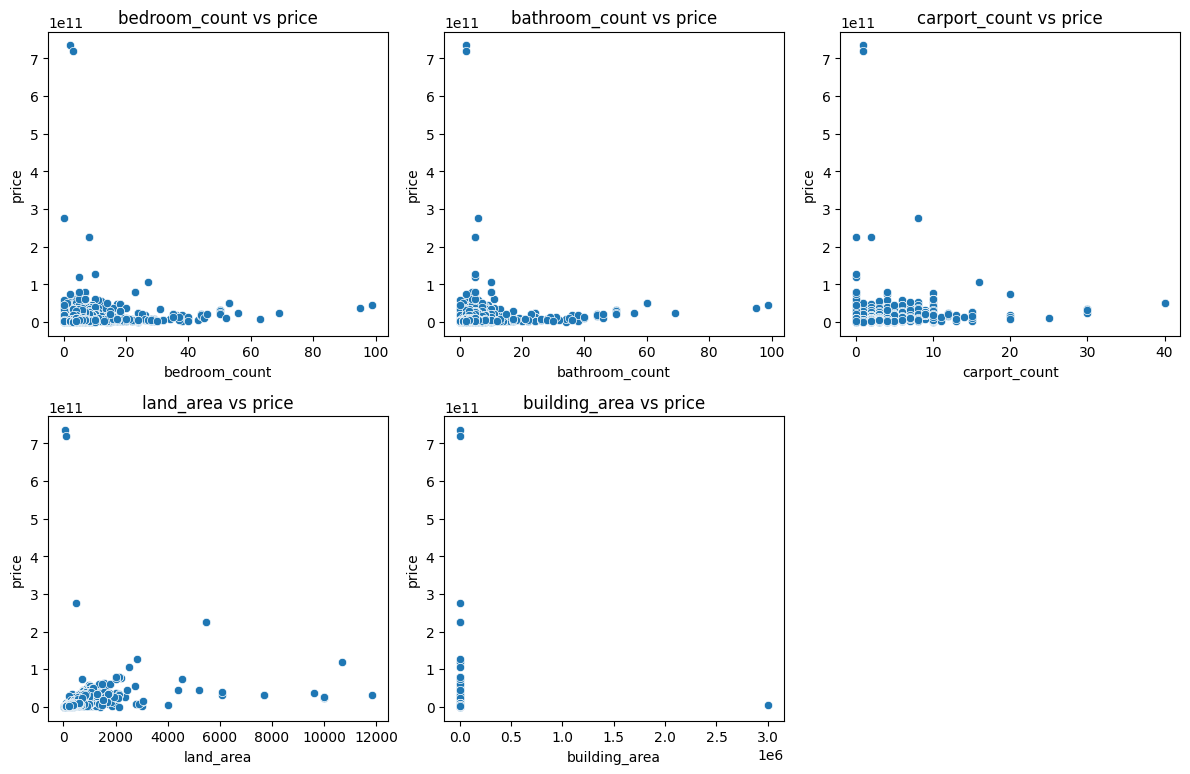

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

x = ['bedroom_count', 'bathroom_count', 'carport_count', 'land_area', 'building_area']
y = 'price'

for i, ax in enumerate(axes.flat):
    if i < len(x):
        sns.scatterplot(x=x[i], y=y, data=df, ax=ax)
        ax.set_title("%s vs %s" % (x[i], y))
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

Kode di atas digunakan untuk menampilkan persebaran data dari masing-masing kolom. Di mana x axisnya adalah variabel-variabel independent (bedroom_count, bathroom_count, carport_count, land_area, dan building_area) dan y axisnya adalah variabel dependent (price). Dapat dilihat bahwa persebarannya tidak merata.

In [9]:
df.corr().style.background_gradient().format(precision=1)

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
bedroom_count,1.0,0.9,0.2,0.1,0.2,0.0
bathroom_count,0.9,1.0,0.2,0.1,0.2,0.0
carport_count,0.2,0.2,1.0,0.2,0.3,0.0
price,0.1,0.1,0.2,1.0,0.4,0.0
land_area,0.2,0.2,0.3,0.4,1.0,0.0
building_area,0.0,0.0,0.0,0.0,0.0,1.0


Kode di atas memperlihatkan korelasi dari masing-masing variabel. Dapat dilihat bahwa korelasi antar variabelnya masih sangatlah rendah. Hal ini dapat menyebabkan akurasi yang rendah pada model.

In [10]:
q11,q31=np.percentile(df['bedroom_count'], [25,75])
s1 = q31-q11
ba1 = q31+(1.5*s1)
bw1 = q11-(1.5*s1)
print(q11)
print(q31)
print(s1)
print(ba1)
print(bw1)

df = df[(df['bedroom_count'] >= bw1) & (df['bedroom_count'] <= ba1)]
df.info()

3.0
5.0
2.0
8.0
0.0
<class 'pandas.core.frame.DataFrame'>
Index: 7128 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   7128 non-null   int64  
 1   bathroom_count  7128 non-null   int64  
 2   carport_count   7128 non-null   int64  
 3   price           7128 non-null   float64
 4   land_area       7128 non-null   int64  
 5   building_area   7128 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 389.8 KB


Kode di atas digunakan untuk membuang outlier dari berdasarkan bedroom_count, di mana interquartil range (S1) dihitung dengan mengurangi quartil atas (q31) dengan quartil bawah (q11). Kemudian dibuat batas atas (ba1) yaitu quartil atas ditambah 1,5 dari interquartil range dan batas bawah (bw1) yaitu quartil bawah dikurangi 1,5 dari interquartil range. Data yang disimpan adalah data yang berada di bawah batas atas dan di atas batas bawah. Setelah pembersihan data, tersisa 7128 baris data.

In [11]:
q12,q32=np.percentile(df['bathroom_count'], [25,75])
s2 = q32-q12
ba2 = q32+(1.5*s2)
bw2 = q12-(1.5*s2)
print(q12)
print(q32)
print(s2)
print(ba2)
print(bw2)

df = df[(df['bathroom_count'] >= bw2) & (df['bathroom_count'] <= ba2)]
df.info()

2.0
3.0
1.0
4.5
0.5
<class 'pandas.core.frame.DataFrame'>
Index: 6466 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   6466 non-null   int64  
 1   bathroom_count  6466 non-null   int64  
 2   carport_count   6466 non-null   int64  
 3   price           6466 non-null   float64
 4   land_area       6466 non-null   int64  
 5   building_area   6466 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 353.6 KB


Kode di atas digunakan untuk membuang outlier berdasarkan kolom bathroom_count, di mana interquartil range (S2) dihitung dengan mengurangi quartil atas (q32) dengan quartil bawah (q12). Kemudian dibuat batas atas (ba2) yaitu quartil atas ditambah 1,5 dari interquartil range dan batas bawah (bw2) yaitu quartil bawah dikurangi 1,5 dari interquartil range. Data yang disimpan adalah data yang berada di bawah batas atas dan di atas batas bawah. Setelah pembersihan data, tersisa 6466 baris data.

In [12]:
q13,q33=np.percentile(df['carport_count'], [25,75])
s3 = q33-q13
ba3 = q33+(1.5*s3)
bw3 = q13-(1.5*s3)
print(q13)
print(q33)
print(s3)
print(ba3)
print(bw3)

df = df[(df['carport_count'] >= bw3) & (df['carport_count'] <= ba3)]
df.info()

0.0
2.0
2.0
5.0
-3.0
<class 'pandas.core.frame.DataFrame'>
Index: 6353 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   6353 non-null   int64  
 1   bathroom_count  6353 non-null   int64  
 2   carport_count   6353 non-null   int64  
 3   price           6353 non-null   float64
 4   land_area       6353 non-null   int64  
 5   building_area   6353 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 347.4 KB


Kode di atas digunakan untuk membuang outlier berdasarkan kolom carport_count, di mana interquartil range (S3) dihitung dengan mengurangi quartil atas (q33) dengan quartil bawah (q13). Kemudian dibuat batas atas (ba3) yaitu quartil atas ditambah 1,5 dari interquartil range dan batas bawah (bw3) yaitu quartil bawah dikurangi 1,5 dari interquartil range. Data yang disimpan adalah data yang berada di bawah batas atas dan di atas batas bawah. Setelah pembersihan data, tersisa 6353 baris data.

In [13]:
q14,q34=np.percentile(df['land_area'], [25,75])
s4 = q34-q14
ba4 = q34+(1.5*s4)
bw4 = q14-(1.5*s4)
print(q14)
print(q34)
print(s4)
print(ba4)
print(bw4)

df = df[(df['land_area'] >= bw4) & (df['land_area'] <= ba4)]
df.info()

97.0
260.0
163.0
504.5
-147.5
<class 'pandas.core.frame.DataFrame'>
Index: 5900 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   5900 non-null   int64  
 1   bathroom_count  5900 non-null   int64  
 2   carport_count   5900 non-null   int64  
 3   price           5900 non-null   float64
 4   land_area       5900 non-null   int64  
 5   building_area   5900 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 322.7 KB


Kode di atas digunakan untuk membuang outlier berdasarkan kolom land_area, di mana interquartil range (S4) dihitung dengan mengurangi quartil atas (q34) dengan quartil bawah (q14). Kemudian dibuat batas atas (ba4) yaitu quartil atas ditambah 1,5 dari interquartil range dan batas bawah (bw4) yaitu quartil bawah dikurangi 1,5 dari interquartil range. Data yang disimpan adalah data yang berada di bawah batas atas dan di atas batas bawah. Setelah pembersihan data, tersisa 5900 baris data.

In [14]:
q15,q35=np.percentile(df['building_area'], [25,75])
s5 = q35-q15
ba5 = q35+(1.5*s5)
bw5 = q15-(1.5*s5)
print(q15)
print(q35)
print(s5)
print(ba5)
print(bw5)

df = df[(df['building_area'] >= bw5) & (df['building_area'] <= ba5)]
df.info()

90.0
240.0
150.0
465.0
-135.0
<class 'pandas.core.frame.DataFrame'>
Index: 5703 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   5703 non-null   int64  
 1   bathroom_count  5703 non-null   int64  
 2   carport_count   5703 non-null   int64  
 3   price           5703 non-null   float64
 4   land_area       5703 non-null   int64  
 5   building_area   5703 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 311.9 KB


Kode di atas digunakan untuk membuang outlier berdasarkan kolom building_area, di mana interquartil range (S5) dihitung dengan mengurangi quartil atas (q35) dengan quartil bawah (q15). Kemudian dibuat batas atas (ba5) yaitu quartil atas ditambah 1,5 dari interquartil range dan batas bawah (bw5) yaitu quartil bawah dikurangi 1,5 dari interquartil range. Data yang disimpan adalah data yang berada di bawah batas atas dan di atas batas bawah. Setelah pembersihan data, tersisa 5703 baris data.

In [15]:
q16,q36=np.percentile(df['price'], [25,75])
s6 = q36-q16
ba6 = q36+(1.5*s6)
bw6 = q16-(1.5*s6)
print(q16)
print(q36)
print(s6)
print(ba6)
print(bw6)

df = df[(df['price'] >= bw6) & (df['price'] <= ba6)]
df.info()

900000000.0
3000000000.0
2100000000.0
6150000000.0
-2250000000.0
<class 'pandas.core.frame.DataFrame'>
Index: 5319 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   5319 non-null   int64  
 1   bathroom_count  5319 non-null   int64  
 2   carport_count   5319 non-null   int64  
 3   price           5319 non-null   float64
 4   land_area       5319 non-null   int64  
 5   building_area   5319 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 290.9 KB


Kode di atas digunakan untuk membuang outlier berdasarkan kolom price, di mana interquartil range (S6) dihitung dengan mengurangi quartil atas (q36) dengan quartil bawah (q16). Kemudian dibuat batas atas (ba6) yaitu quartil atas ditambah 1,5 dari interquartil range dan batas bawah (bw6) yaitu quartil bawah dikurangi 1,5 dari interquartil range. Data yang disimpan adalah data yang berada di bawah batas atas dan di atas batas bawah. Setelah pembersihan data, tersisa 5319 baris data.

In [16]:
df.min()

bedroom_count            0.0
bathroom_count           1.0
carport_count            0.0
price             22000000.0
land_area                6.0
building_area            1.0
dtype: float64

Kode di atas digunakan untuk menampilkan nilai minimum dari masing-masing kolom pada dataframe. Sangat tidak wajar ada rumah yang tidak memiliki kamar tidur atau luas bangunan hanya 1 meter persegi. Oleh karena itu, data yang tidak wajar ini juga harus dibuang.

In [17]:
df = df[(df['bedroom_count']>0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5281 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   5281 non-null   int64  
 1   bathroom_count  5281 non-null   int64  
 2   carport_count   5281 non-null   int64  
 3   price           5281 non-null   float64
 4   land_area       5281 non-null   int64  
 5   building_area   5281 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 288.8 KB


Kode di atas digunakan untuk membuang data yang di mana bedroom_countnya 0 atau di bawah 0. Setelah pembersihan data, tersisa 5281 baris data.

In [18]:
df.min()

bedroom_count            1.0
bathroom_count           1.0
carport_count            0.0
price             22000000.0
land_area                6.0
building_area            1.0
dtype: float64

Kode di atas digunakan untuk menampilkan nilai minimum dari masing-masing kolom pada dataframe. Sangat tidak wajar ada luas bangunan hanya 1 meter persegi. Oleh karena itu, data yang tidak wajar ini juga harus dibuang.

In [19]:
df = df[(df['building_area']>1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5279 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   5279 non-null   int64  
 1   bathroom_count  5279 non-null   int64  
 2   carport_count   5279 non-null   int64  
 3   price           5279 non-null   float64
 4   land_area       5279 non-null   int64  
 5   building_area   5279 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 288.7 KB


Kode di atas digunakan untuk membuang data yang di mana building_areanya 1 atau dibawah 1. Setelah pembersihan data, tersisa 5279 baris data.

In [20]:
df.min()

bedroom_count            1.0
bathroom_count           1.0
carport_count            0.0
price             22000000.0
land_area                6.0
building_area           18.0
dtype: float64

Kode di atas digunakan untuk menampilkan nilai minimum dari masing-masing kolom pada dataframe.

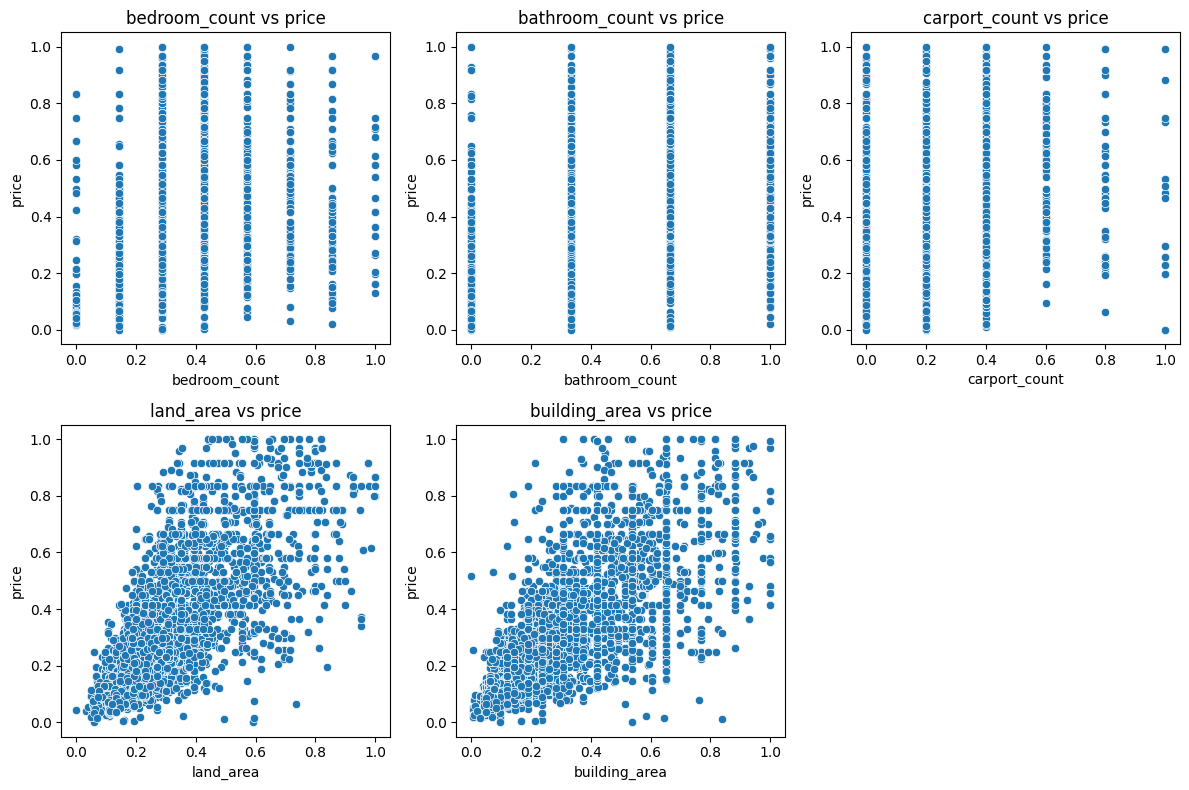

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

x = ['bedroom_count', 'bathroom_count', 'carport_count', 'land_area', 'building_area']
y = 'price'

for i, ax in enumerate(axes.flat):
    if i < len(x):
        sns.scatterplot(x=x[i], y=y, data=df, ax=ax)
        ax.set_title("%s vs %s" % (x[i], y))
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

Kode di atas digunakan untuk menampilkan persebaran data dari masing-masing kolom. Di mana x axisnya adalah variabel-variabel independent (bedroom_count, bathroom_count, carport_count, land_area, dan building_area) dan y axisnya adalah variabel dependent (price). Dapat dilihat bahwa persebarannya sudah cukup merata, sehingga cocok untuk digunakan dalam sebuah model regresi.

In [22]:
df.corr().style.background_gradient().format(precision=1)

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
bedroom_count,1.0,0.6,0.1,0.5,0.5,0.6
bathroom_count,0.6,1.0,0.2,0.6,0.4,0.6
carport_count,0.1,0.2,1.0,0.2,0.3,0.2
price,0.5,0.6,0.2,1.0,0.7,0.8
land_area,0.5,0.4,0.3,0.7,1.0,0.7
building_area,0.6,0.6,0.2,0.8,0.7,1.0


Kode di atas memperlihatkan korelasi dari masing-masing variabel. Dapat dilihat bahwa korelasi antar variabelnya sudah cukup tinggi kecuali kolom carport_count. Hal ini menandakan variabel bedroom_count, bathroom_count, land_area, dan building_area berpengaruh cukup tinggi terhadap variabel price. 

### Normalisasi data

In [23]:
scaler = MinMaxScaler()

fitur = ['bedroom_count', 'bathroom_count', 'carport_count', 'land_area', 'building_area']
target = 'price'

scaler_fitur = MinMaxScaler()
df[fitur] = scaler_fitur.fit_transform(df[fitur])

scaler_target = MinMaxScaler()
df[[target]] = scaler_target.fit_transform(df[[target]])

Kode di atas digunakan untuk menormalisasi data dengan metode min-max menggunakan MinMaxScaler dari sklearn. Pertama-tama variabel independent dimasukkan ke dalam list fitur dan variabel dependent dijadikan target. Kemudian masing-masing scaler untuk fitur dan target diinisialisasi dan digunakan untuk menormalisasi data-data yang ada.

In [24]:
df.head()

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
0,0.285714,0.333333,0.4,0.347608,0.265182,0.351852
1,0.285714,0.333333,0.6,0.682168,0.396761,0.652778
2,0.571429,0.333333,0.2,0.548344,0.696356,0.555556
3,0.142857,0.333333,0.2,0.093342,0.048583,0.143519
5,0.571429,0.666667,0.2,0.598528,0.360324,0.500000


Kode di atas digunakan untuk memperlihatkan 5 data teratas dari dataframe yang sudah dinormalisasi.

### Train dan Validasi Model

In [25]:
x = df[fitur]
y = df[target]

Kode di atas digunakan untuk memasukkan fitur-fitur dari dataframe ke dalam x dan target dari dataframe ke dalam y. X di sini sebagai variabel independent, sedangkan y di sini sebagai variabel dependent.

In [26]:
def cross_validation_regression(x, y, model):
    y_pred = cross_val_predict(model, x, y, cv=5)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, mae, r2

Kode di atas digunakan untuk mendefinisikan fungsi cross_validation_regression di mana fungsi ini melakukan cross validation dengan 5 folds (cv=5) berdasarkan data fitur x dan data target y, serta model yang diinginkan, kemudian dihitung MSE, MAE, dan R-squarednya dan direturn.

In [27]:
mse_knn, mae_knn, r2_knn = cross_validation_regression(x, y, KNeighborsRegressor(n_neighbors=150))
mse_svr, mae_svr, r2_svr = cross_validation_regression(x, y, SVR(kernel='linear'))
mse_rf, mae_rf, r2_rf = cross_validation_regression(x, y, RandomForestRegressor(n_estimators=2000, random_state=42))

Kode di atas adalah penggunaan dari fungsi cross_validation_regression untuk model KNN, SVR, dan RF. Hasilnya adalah MSE, MAE, dan R-squared dari masing-masing model setelah cross validation. Dilakukan uji coba berkali-kali untuk beberapa hyperparameter untuk mencari nilai R-squared terbaik.

In [28]:
print("MSE KNN:", mse_knn)
print("MAE KNN:", mae_knn)
print("R2 KNN:", r2_knn)

print("MSE SVR:", mse_svr)
print("MAE SVR:", mae_svr)
print("R2 SVR:", r2_svr)

print("MSE RF:", mse_rf)
print("MAE RF:", mae_rf)
print("R2 RF:", r2_rf)

MSE KNN: 0.017998594396858174
MAE KNN: 0.09602486104202285
R2 KNN: 0.6393307245568545
MSE SVR: 0.016689174190204457
MAE SVR: 0.09229934099378863
R2 SVR: 0.6655698645014074
MSE RF: 0.018330251395624008
MAE RF: 0.09283909930254577
R2 RF: 0.6326847339420872


Kode di atas mencetak nilai MSE, MAE, dan R-squared dari masing-masing model yang sudah dilatih secara cross-validation sebelumnya.

In [31]:
kfold = KFold(n_splits=10, shuffle=True)

fold = 1
meanR2 = []
meanMAE = []
meanMSE = []

for train, test in kfold.split(x,y):
    model = Sequential()
    model.add(Dense(10, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(
        loss = 'mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(0.001),
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    print("Training k-fold ke-", fold)
    model.fit(
        x.iloc[train], y.iloc[train],
        batch_size=32,
        epochs=100,
        verbose=0
    )

    hasil = model.evaluate(x.iloc[test], y.iloc[test], verbose=0)
    y_pred = model.predict(x.iloc[test])
    r2 = r2_score(y.iloc[test], y_pred)
    print("MSE = ",hasil[0])
    print("MAE = ", hasil[1])
    print("R2 = ", r2*100, "%")

    meanMSE.append(hasil[0])
    meanMAE.append(hasil[1])
    meanR2.append(r2*100)

    fold += 1

Training k-fold ke- 1
17/17 [==============================] - 0s 3ms/step
MSE =  0.01719183474779129
MAE =  0.09453746676445007
R2 =  66.98290445026825 %
Training k-fold ke- 2
17/17 [==============================] - 0s 2ms/step
MSE =  0.015611971728503704
MAE =  0.08529867231845856
R2 =  68.89019326963788 %
Training k-fold ke- 3
17/17 [==============================] - 0s 2ms/step
MSE =  0.013686612248420715
MAE =  0.08694449067115784
R2 =  70.61435071142034 %
Training k-fold ke- 4
17/17 [==============================] - 0s 3ms/step
MSE =  0.013135168701410294
MAE =  0.08319798111915588
R2 =  71.64920598995117 %
Training k-fold ke- 5
17/17 [==============================] - 0s 3ms/step
MSE =  0.015715042129158974
MAE =  0.09020622819662094
R2 =  71.06111647443274 %
Training k-fold ke- 6
17/17 [==============================] - 0s 3ms/step
MSE =  0.014441116712987423
MAE =  0.0853792130947113
R2 =  72.1298293136273 %
Training k-fold ke- 7
17/17 [==============================] - 0s 3

Kode di atas adalah cross validation dengan k-fold menggunakan model ANN. Jadi jumlah foldsnya adalah 10, di mana model ANN yang dipakai adalah model dengan 3 layer, yaitu:
1. layer input dengan nodes 10 dan fungsi aktivasi relu
2. layer hidden dengan nodes 8 dan fungsi aktivasi relu
3. layer output dengan node 1 dan fungsi aktivasi linear

Hasil dari masing-masing folds (MSE, MAE, dan R-squared) akan disimpan di list-list yang nantinya akan dihitung rata-ratanya.

In [32]:
totalMSE = 0
totalMAE = 0
totalR2 = 0

for i in range(len(meanR2)):
    totalR2 += meanR2[i]
    totalMSE += meanMSE[i]
    totalMAE += meanMAE[i]

totalR2/=len(meanR2)
totalMSE/=len(meanMSE)
totalMAE/=len(meanMAE)

print("rata rata R2 = ", totalR2, "%")
print("rata rata MSE = ", totalMSE)
print("rata rata MAE = ", totalMAE)

rata rata R2 =  69.14653070970856 %
rata rata MSE =  0.015318226348608733
rata rata MAE =  0.08797724768519402


Kode di atas adalah perhitungan rata-rata dari MSE, MAE, dan R-squared dari cross validation ANN sebelumnya.

In [ ]:
# ini untuk menyimpan model, uncomment jika dibutuhkan
# model.save('modelANN_69_25.keras')

Kode di atas adalah penyimpanan model ke storage jika ingin menyimpan model untuk digunakan nanti.

In [ ]:
# ini untuk meload model, uncomment jika dibutuhkan
# model = tf.keras.models.load_model('modelANN_69_25.keras')

Kode di atas adalah load model dari storage jika ingin menggunakan model tersebut untuk melakukan prediksi atau estimasi.

### Menggunakan Model untuk Prediksi Harga Rumah

In [33]:
def prediksi(data):
    data_prediksi = pd.DataFrame(data)
    data_prediksi_normalized = scaler_fitur.transform(data_prediksi[fitur])
    prediksi_normalized = model.predict(data_prediksi_normalized)

    prediksi = scaler_target.inverse_transform(prediksi_normalized)
    print(prediksi)
    return prediksi  

Kode di atas digunakan untuk melakukan prediksi atau estimasi menggunakan model yang sudah dilatih sebelumnya. Jadi data fitur baru untuk memprediksi dimasukkan ke dalam dataframe, kemudian dinormalisasi dengan scaler yang sama saat melatih model. Model kemudian digunakan untuk memprediksi berdasarkan data yang baru tersebut. Hasilnya di-invers transform agar nilainya kembali ke dalam bentuk non-normalized. Hasilnya kemudian diprint dan direturn.

In [34]:
data = {'bedroom_count': [3],
        'bathroom_count': [2],
        'carport_count': [2],
        'land_area': [137],
        'building_area': [170]}

hasil_prediksi = prediksi(data).flatten()

1/1 [==============================] - 0s 79ms/step
[[2.225262e+09]]


Kode di atas adalah contoh prediksi/estimasi dengan data baru mengunakan model yang telah dilatih sebelumnya. Hasil prediksi/estimasi pun dicetak pada layar karena sudah ada code print dalam fungsi prediksi.